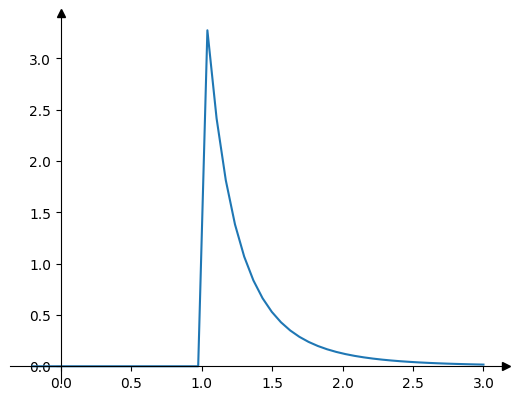

In [ ]:
# @title График функции плотности { form-width: "600px" }
from matplotlib import pyplot as plt
import numpy as np
import scipy
import scipy.integrate

# Константы, которые даны в начале работы
A, B = 2, 3
P = 0.2
PRECISION = 50

def function(x: float) -> float:
    """
    Плотность функции
    param x: value
    """
    if x < 1:
        return 0
    return 4/(x**5)

def build_plot(x_axis, y_axis):
    fig, ax = plt.subplots()
    # Move the left and bottom spines to x = 0 and y = 0, respectively.
    ax.spines[["left", "bottom"]].set_position(("data", 0))
    # Hide the top and right spines.
    ax.spines[["top", "right"]].set_visible(False)

    # Draw arrows (as black triangles: ">k"/"^k") at the end of the axes.  In each
    # case, one of the coordinates (0) is a data coordinate (i.e., y = 0 or x = 0,
    # respectively) and the other one (1) is an axes coordinate (i.e., at the very
    # right/top of the axes).  Also, disable clipping (clip_on=False) as the marker
    # actually spills out of the axes.
    ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
    plt.plot(x_axis, y_axis)



# Устанавливаем X-axis
x_axis = np.linspace(-0.2, 3, PRECISION)
# Устанавливаем Y-axis
y_axis = [function(dot) for dot in x_axis]

#Запускаем график
#build_plot(x_axis, y_axis)

build_plot(x_axis, y_axis)

plt.show()

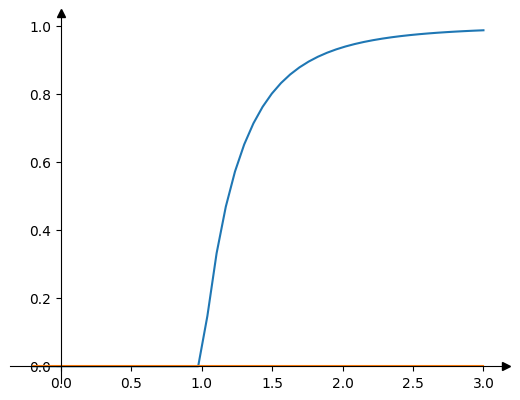

In [ ]:
# @title График функции вероятности (распределения) { form-width: "600px" }

integrated_function = lambda x: scipy.integrate.quad(function, 1, x)

y_axis = [integrated_function(dot) for dot in x_axis]
build_plot(x_axis, y_axis)

plt.show()



Проверка условия нормировки

In [ ]:
normalization, _ = scipy.integrate.quad(function, -np.inf, np.inf)
print(f'Условие нормировки: {normalization}')

Условие нормировки: 1.0


Математическое ожидание

In [ ]:
E = scipy.integrate.quad(lambda x: x * function(x), -np.inf, +np.inf)[0]


print(f"Математическое ожидание E: {E}")

Математическое ожидание E: 1.3333333333333333


Дисперсия

In [ ]:
D_func = lambda x: pow(x, 2) *function(x)
D_integral = scipy.integrate.quad(D_func, -np.inf, +np.inf)[0] - E**2
D = D_integral
print(f"Дисперсия D: {D_integral}")

Дисперсия D: 0.22222222222222276


СКО

In [ ]:
SIGMA = (D)**0.5

print(f"Стандартное отклонение: {SIGMA}")

Стандартное отклонение: 0.47140452079103223


Вероятность попадения в интервал

In [ ]:
p1 = scipy.integrate.quad(function, A, B)[0]

print(f"При помощи интеграла: {p1}")

При помощи интеграла: 0.050154320987654315


In [ ]:
p2 = integrated_function(B)[0] - integrated_function(A)[0]

print(f"При помощи функции распределения: {p2}")

При помощи функции распределения: 0.0501543209876546


Медиана и квантиль


In [ ]:
mediana_func = np.vectorize(lambda x: integrated_function(x)[0] - 0.5)
quantile_func = np.vectorize(lambda x: integrated_function(x)[0] - P)

mediana = scipy.optimize.root(mediana_func, 1)
quantile = scipy.optimize.root(quantile_func, 1)

print(f"Медиана: {mediana.x[0]}")
print(f"Квантиль: {quantile.x[0]}")

Медиана: 1.189207115002721
Квантиль: 1.057371263440564
